In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_no = 4
bg = cv2.imread("raw_images/bg.png")
im1 = cv2.imread(f"raw_images/{image_no}.png")
im1_hsv = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV)

(left, upper, right, lower) = (503, 263, 1436, 823)
bg = bg[upper:lower, left:right]
im1 = im1[upper:lower, left:right]
im1_hsv = im1_hsv[upper:lower, left:right]

bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

In [4]:
cv2.imshow('bg',bg)
cv2.imshow('1',im1)
cv2.imshow('2',im1_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
im_sub = cv2.subtract(im1, bg)
im_sub = cv2.cvtColor(im_sub, cv2.COLOR_BGR2GRAY)

In [6]:
ret,thresh1 = cv2.threshold(im_sub,5,255,cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh1,kernel,iterations = 2)
erosion = cv2.erode(dilation,kernel,iterations = 2)

In [7]:
cv2.imshow('bg_sub', im_sub)
cv2.imshow('thresh1', thresh1)
cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
retval,labels = cv2.connectedComponents(erosion)

In [52]:
def plot_hist(im, mask):
    chans = cv2.split(im)
    colors = ("b", "g", "r")
    
    plt.figure()
#     plt.title("'Flattened' Color Histogram")
#     plt.xlabel("Bins")
#     plt.ylabel("# of Pixels")
    
    hist_arr = []
    
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        plt.title("'Flattened' Color Histogram")
        plt.xlabel("Bins")
        plt.ylabel("# of Pixels")
        
        hist = cv2.calcHist([chan], [0], mask, [128], [0, 256])
        norm_hist = cv2.normalize(hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        hist_arr.append(norm_hist)
        # plot the histogram
        plt.plot(norm_hist, color = color)
        plt.xlim([0, 128])
    plt.show()    
    plt.close()
    
    return hist_arr

image no. 4


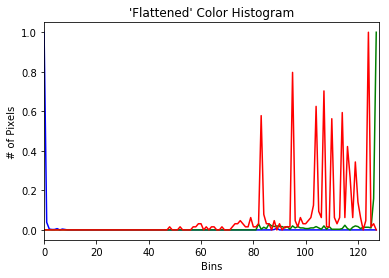

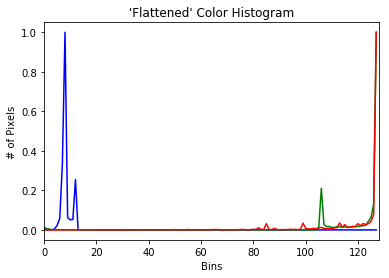

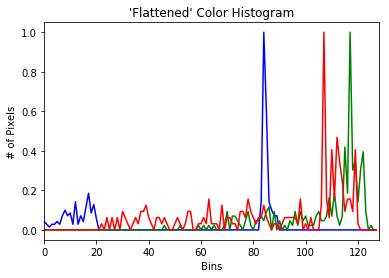

In [53]:
print(f"image no. {image_no}")
for i in range(1, retval):
    mask = np.zeros(labels.shape, dtype=np.uint8)
    mask[labels == i] = 255
    
    masked = cv2.bitwise_and(im1, im1, mask=mask)
    
    dir_path = f"proc_images/im_{image_no}"
    if(not os.path.exists(dir_path)):
        os.mkdir(dir_path)
    
    mask_filename = f"proc_images/im_{image_no}/mask_item_{i}.png"
    cv2.imwrite(mask_filename, mask)

    res = cv2.bitwise_and(im1, im1, mask = mask)
    filename = f"proc_images/im_{image_no}/item_{i}.png"
    cv2.imwrite(mask_filename, res)
    
#     cv2.imshow('component', mask)
    cv2.imshow('masked', res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    hist_arr = plot_hist(im1_hsv, mask)
    
plt.close()

## Functions

In [56]:
def image_segmentation(image_no):
    bg = cv2.imread("raw_images/bg.png")
    im1 = cv2.imread(f"raw_images/{image_no}.png")
    im1_hsv = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV)

    (left, upper, right, lower) = (503, 263, 1436, 823)
    bg = bg[upper:lower, left:right]
    im1 = im1[upper:lower, left:right]

    bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
    im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

    im_sub = cv2.subtract(im1, bg)
    im_sub = cv2.cvtColor(im_sub, cv2.COLOR_BGR2GRAY)

    ret,thresh1 = cv2.threshold(im_sub,5,255,cv2.THRESH_BINARY)

    kernel = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(thresh1,kernel,iterations = 2)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    
#     cv2.imshow('erosion', erosion)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    retval,labels = cv2.connectedComponents(erosion)
    
    print(f"image no. {image_no}")
    hist_arr_img = []
    for i in range(1, retval):
        mask = np.zeros(labels.shape, dtype=np.uint8)
        mask[labels == i] = 255

        masked = cv2.bitwise_and(im1, im1, mask=mask)

        dir_path = f"proc_images/im_{image_no}"
        if(not os.path.exists(dir_path)):
            os.mkdir(dir_path)

        mask_filename = f"proc_images/im_{image_no}/mask_item_{i}.png"
        cv2.imwrite(mask_filename, mask)

        res = cv2.bitwise_and(im1, im1, mask = mask)
        filename = f"proc_images/im_{image_no}/item_{i}.png"
        cv2.imwrite(filename, res)
        
#         cv2.imshow(f"masked_{i}", res)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

        hist_arr = plot_hist(im1, mask)
        hist_arr_img.append(hist_arr)
    
    return hist_arr_img

image no. 1


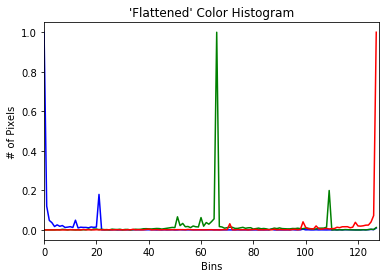

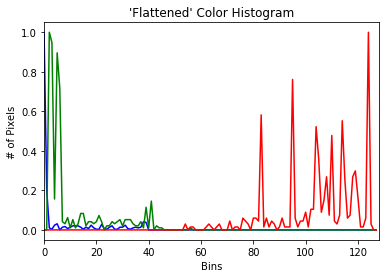

image no. 2


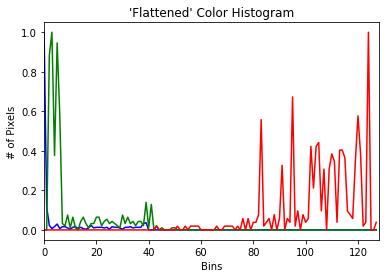

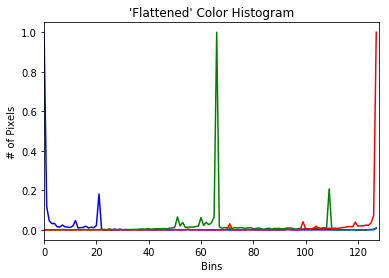

image no. 3


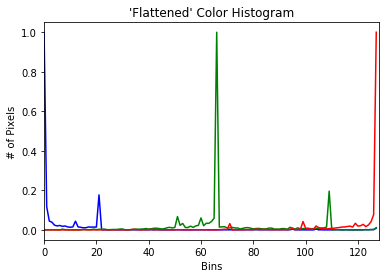

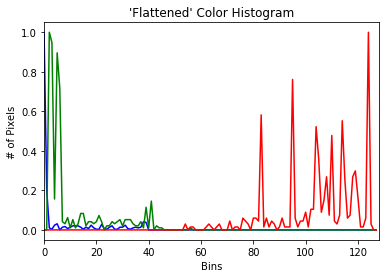

image no. 4


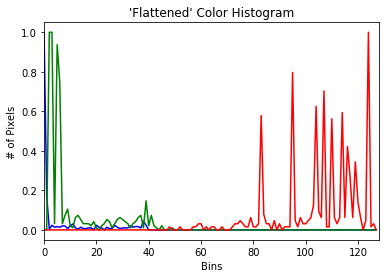

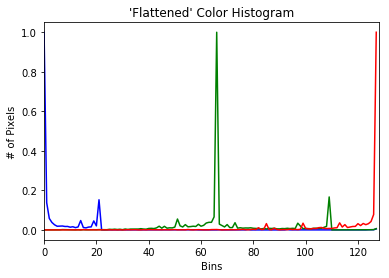

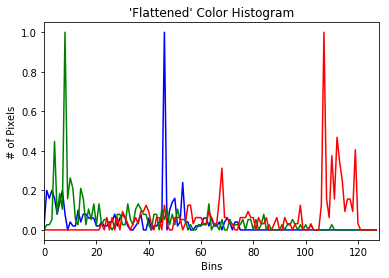

image no. 5


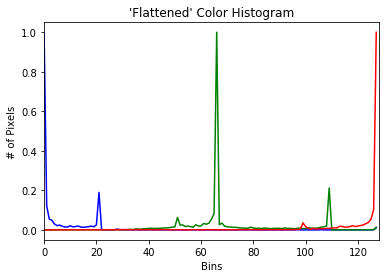

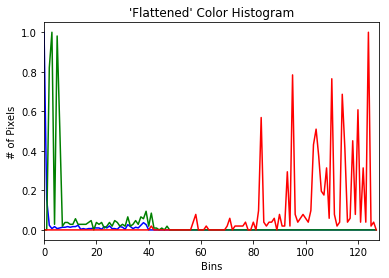

image no. 6


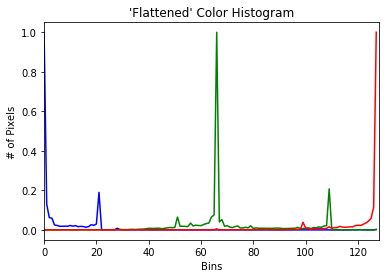

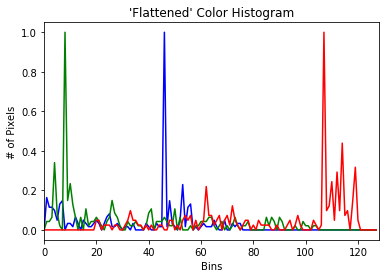

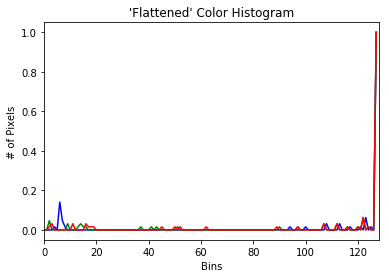

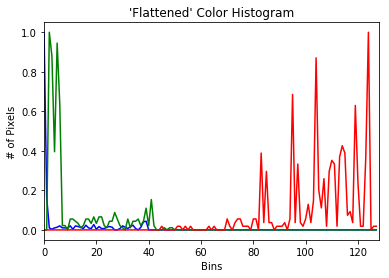

image no. 7


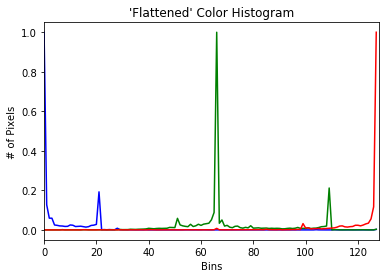

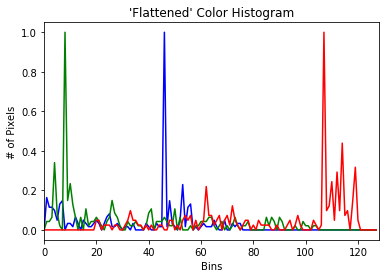

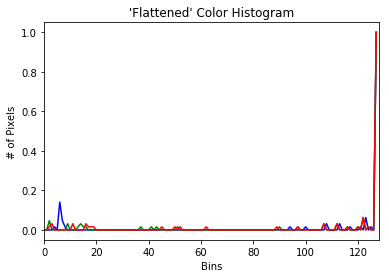

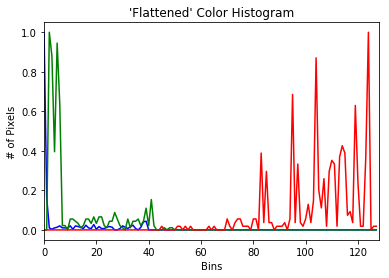

image no. 8


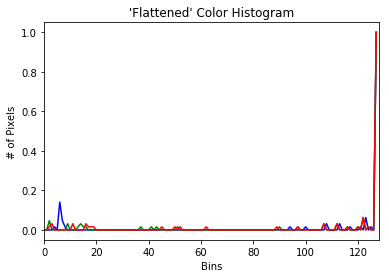

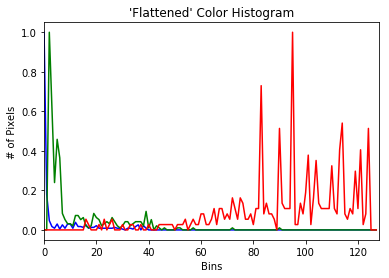

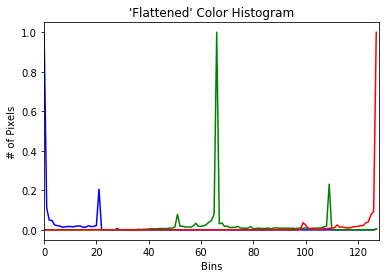

image no. 9


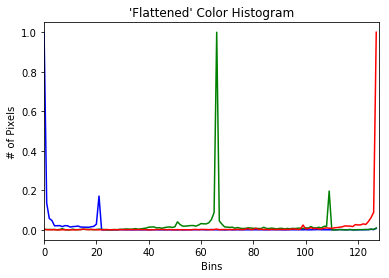

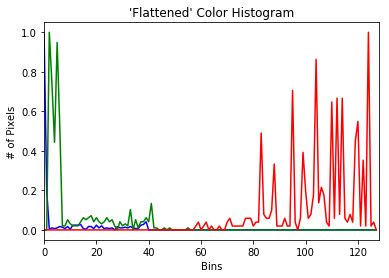

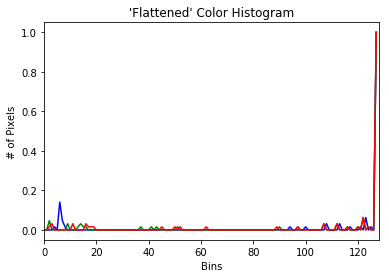

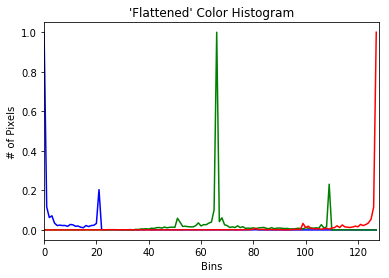

image no. 10


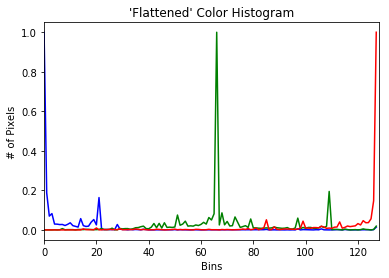

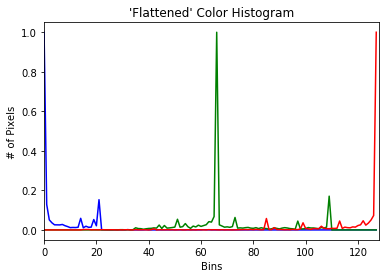

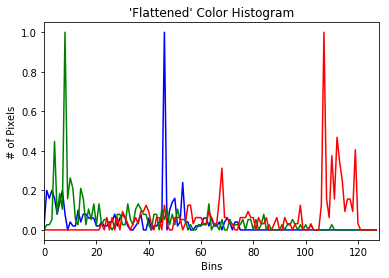

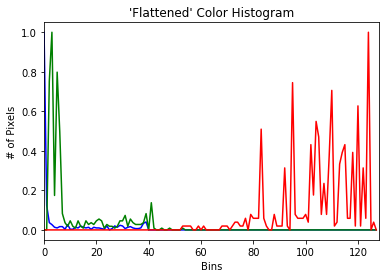

In [57]:
all_hist = []
for i in range(1, 11):
    hist_arr_img = image_segmentation(i)
    all_hist.append(hist_arr_img)

In [62]:
colors = ["b", "g", "r"]
x = [0,1,2,3,4,5,6,7,8,8,9,9]
y = [0,1,0,1,0,0,0,2,0,3,1,3]

for idx in range(len(x)-1):
    print(f"compare between image: {idx} and {idx+1}")
    hist1 = all_hist[x[idx]][y[idx]]
    hist2 = all_hist[x[idx+1]][y[idx+1]]
    for i in range(3):
        diff = cv2.compareHist(hist1[i], hist2[i], 1)
        print(f"{colors[i]}: {diff}")

#     for i in range(3):
#         plt.plot(hist1[i], color=colors[i])
#         plt.xlim([0, 256])
#     plt.show()

#     for i in range(3):
#         plt.plot(hist2[i], color=colors[i])
#         plt.xlim([0, 256])
#     plt.show()

compare between image: 0 and 1
b: 0.08027297140828142
g: 0.14395096639444943
r: 0.10505716707375136
compare between image: 1 and 2
b: 0.10346758555400104
g: 0.13692475933090517
r: 0.11245278395079923
compare between image: 2 and 3
b: 0.22772989923878476
g: 0.4418602522097845
r: 0.8137755994040238
compare between image: 3 and 4
b: 0.1842712327351956
g: 0.17972027719112407
r: 0.17646877688162643
compare between image: 4 and 5
b: 0.06183084676396888
g: 0.12774233277886488
r: 0.07493686309930603
compare between image: 5 and 6
b: 0.012961908676460111
g: 0.029522296505877548
r: 0.03035841030659663
compare between image: 6 and 7
b: 0.06505153566929775
g: 0.11050810742898429
r: 0.1037194013923153
compare between image: 7 and 8
b: 0.21454181400486647
g: 0.6048061383306592
r: 1.0794382958910982
compare between image: 8 and 9
b: 0.147070939289965
g: 0.2873555944666903
r: 0.17106010803471494
compare between image: 9 and 10
b: 0.27247069753834835
g: 0.587230265707646
r: 9.58535848116941
compare bet